<a href="https://colab.research.google.com/github/arjun28115/Computer-Vision-Project/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
url = 'https://drive.google.com/uc?export=download&id=1SuPF92Utjjpaq14M50b1_xRjNZZRklMd'
with urllib.request.urlopen(url) as url_response:
    img = np.array(Image.open(url_response))

(np.float64(-0.5), np.float64(2559.5), np.float64(1439.5), np.float64(-0.5))

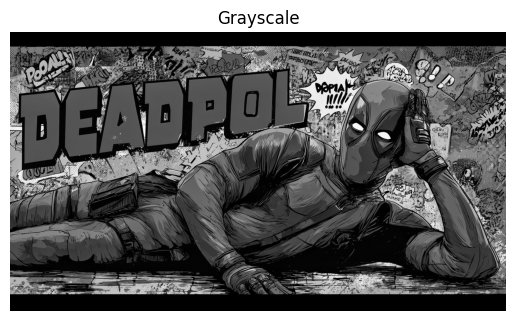

In [269]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.title("Grayscale")
plt.imshow(img_gray, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(2559.5), np.float64(1439.5), np.float64(-0.5))

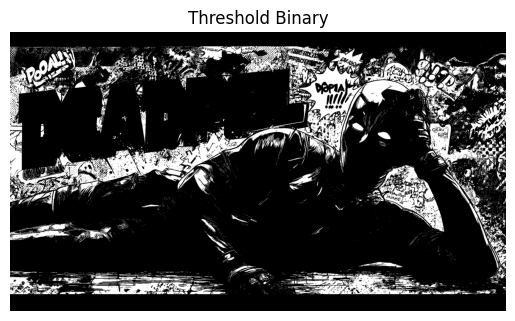

In [270]:
ret,thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.title("Threshold Binary")
plt.imshow(thresh1, cmap='gray')
plt.axis("off")

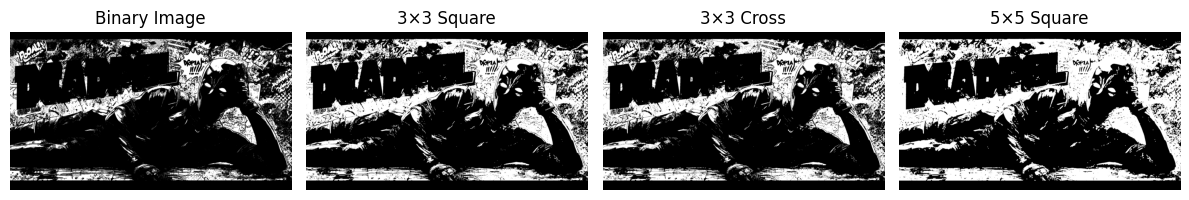

In [271]:
se_square_3 = np.ones((3, 3), np.uint8)
se_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
se_square_5 = np.ones((5, 5), np.uint8)
dilate_square_3 = cv2.dilate(thresh1, se_square_3)
dilate_cross_3  = cv2.dilate(thresh1, se_cross_3)
dilate_square_5 = cv2.dilate(thresh1, se_square_5)
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.title("Binary Image")
plt.imshow(thresh1, cmap='gray')
plt.axis("off")
plt.subplot(1, 4, 2)
plt.title("3×3 Square")
plt.imshow(dilate_square_3, cmap='gray')
plt.axis("off")
plt.subplot(1, 4, 3)
plt.title("3×3 Cross")
plt.imshow(dilate_cross_3, cmap='gray')
plt.axis("off")
plt.subplot(1, 4, 4)
plt.title("5×5 Square")
plt.imshow(dilate_square_5, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()
# Observation:
# Larger structuring elements cause faster and thicker object growth,
# while cross-shaped SEs expand objects selectively along horizontal and
# vertical directions.

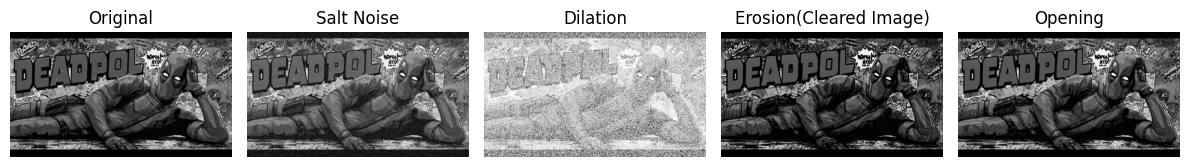

In [272]:
prob = 0.09
rand = np.random.rand(*img_gray.shape)
noisy_img = img_gray.copy()
noisy_img[rand > 1 - prob] = 255
se = np.ones((3,3), np.uint8)
dilated = cv2.dilate(noisy_img, se)
eroded  = cv2.erode(noisy_img, se)
opening = cv2.morphologyEx(noisy_img, cv2.MORPH_OPEN, se)
titles = ["Original", "Salt Noise", "Dilation", "Erosion(Cleared Image)","Opening"]
images = [img_gray, noisy_img, dilated, eroded,opening]

plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.show()
# Observation:
# Opening effectively removes isolated salt noise pixels while
# preserving object boundaries better than erosion alone.

In [273]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
url = 'https://drive.google.com/uc?export=download&id=1B2dMTo4jSC1qf11jZH244YSa7E4dRkcl'
with urllib.request.urlopen(url) as url_response:
    img2 = np.array(Image.open(url_response))

(np.float64(-0.5), np.float64(307.5), np.float64(271.5), np.float64(-0.5))

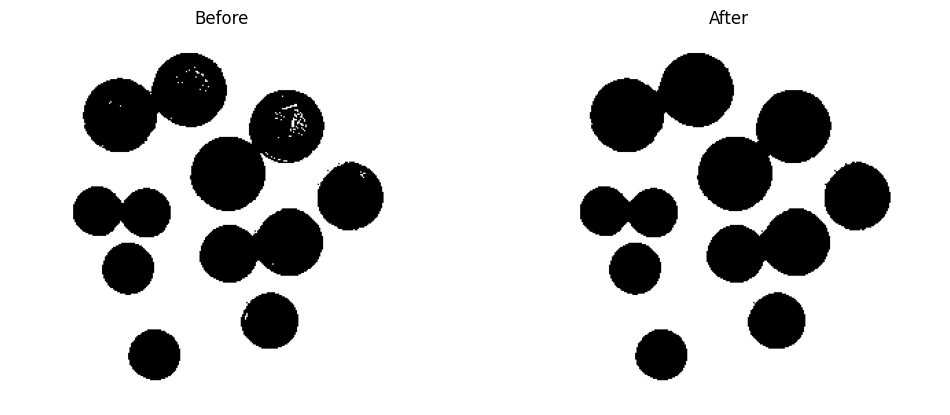

In [274]:
import cv2
import numpy as np

img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

_, binary = cv2.threshold(img2_gray, 127, 255, cv2.THRESH_BINARY)

binary_inv = cv2.bitwise_not(binary)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

closed = cv2.morphologyEx(binary_inv, cv2.MORPH_CLOSE, kernel)
filled = cv2.bitwise_not(closed)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Before")
plt.imshow(img2_gray, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(filled, cmap='gray')
plt.axis("off")

If the structuring element is too large, morphological closing over-fills gaps, causing nearby objects to merge and significantly altering object shape and size, leading to loss of fine details.

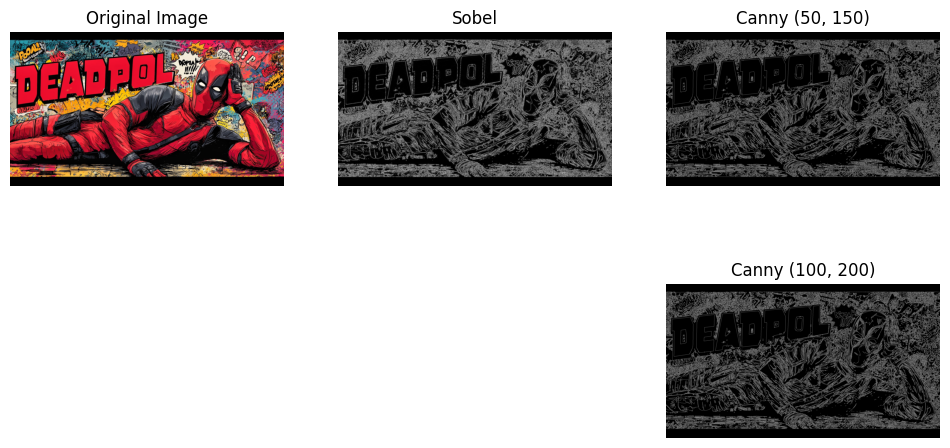

In [275]:
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(sobel)

canny1 = cv2.Canny(img_gray, 50, 150)
canny2 = cv2.Canny(img_gray, 100, 200)
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Sobel")
plt.imshow(sobel, cmap='gray')
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Canny (50, 150)")
plt.imshow(canny1, cmap='gray')
plt.axis("off")

plt.subplot(2,3,6)
plt.title("Canny (100, 200)")
plt.imshow(canny2, cmap='gray')
plt.axis("off")

plt.show()


As Canny thresholds increase, weak edges caused by texture, noise, and gradual intensity changes disappear first, while strong object boundaries remain visible.

In [276]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
url = 'https://drive.google.com/uc?export=download&id=16Qin5n-OS_FE22Kmd93zV0wn40NyvW0U'
with urllib.request.urlopen(url) as url_response:
    img3 = np.array(Image.open(url_response))

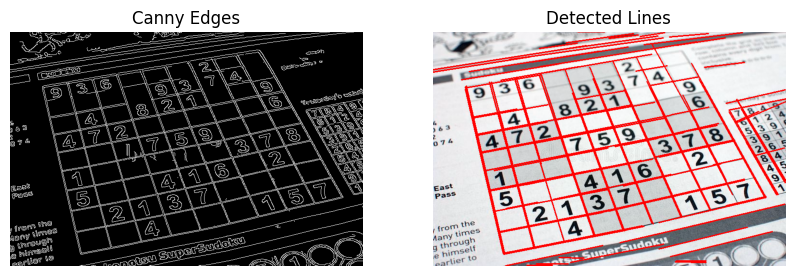

In [277]:
img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(img3_gray, 50, 150)
lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=100,
    minLineLength=50,
    maxLineGap=10
)
line_img = img3.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1,y1), (x2,y2), (0,0,255), 2)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


When the Hough threshold is too low, many false lines are detected because random edge points receive enough votes, resulting in noisy and cluttered line detection.

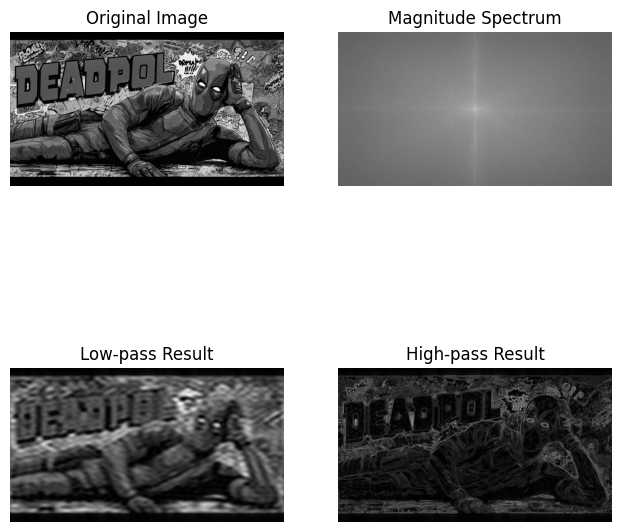

In [278]:
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)

magnitude = 20 * np.log(np.abs(fshift) + 1)

rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2

lp_mask = np.zeros((rows, cols), np.uint8)
lp_mask[crow-30:crow+30, ccol-30:ccol+30] = 1

hp_mask = 1 - lp_mask

low_pass = fshift * lp_mask
high_pass = fshift * hp_mask
img_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(low_pass)))
img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(high_pass)))
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude, cmap='gray')
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Low-pass Result")
plt.imshow(img_lp, cmap='gray')
plt.axis("off")

plt.subplot(2,3,5)
plt.title("High-pass Result")
plt.imshow(img_hp, cmap='gray')
plt.axis("off")

plt.show()

High-pass filtering affects edges more because edges correspond to high-frequency components, which are preserved and emphasized in the high-pass result, while low-pass filtering removes them, causing blurring

In [279]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
url = 'https://drive.google.com/uc?export=download&id=1pEKjU7HRWzEyPnYqQ1cXTarkkPfIoLKU'
with urllib.request.urlopen(url) as url_response:
    img4 = np.array(Image.open(url_response))

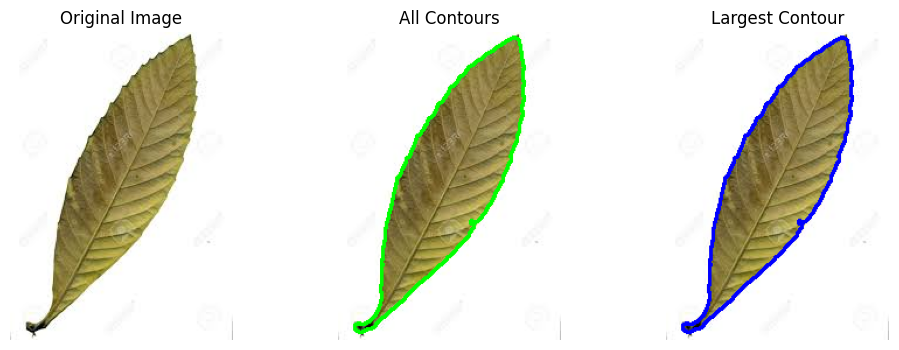

In [280]:
img4_gray = cv2.cvtColor(img4, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(
    img4_gray, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(
    binary,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

all_contours_img = img4.copy()
cv2.drawContours(
    all_contours_img,
    contours,
    -1,
    (0, 255, 0),
    2
)

largest_contour = max(contours, key=cv2.contourArea)

largest_contour_img = img4.copy()
cv2.drawContours(
    largest_contour_img,
    [largest_contour],
    -1,
    (0, 0, 255),
    2
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img4)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("All Contours")
plt.imshow(all_contours_img)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Largest Contour")
plt.imshow(largest_contour_img)
plt.axis("off")

plt.show()



With proper thresholding and foreground–background separation, contours accurately trace object boundaries, and the largest contour correctly corresponds to the main object.

In [281]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image
url = 'https://drive.google.com/uc?export=download&id=1RB41o3mTcj-WBkyJXDN_NpNFRdMY-R6M'
with urllib.request.urlopen(url) as url_response:
    img5 = np.array(Image.open(url_response))

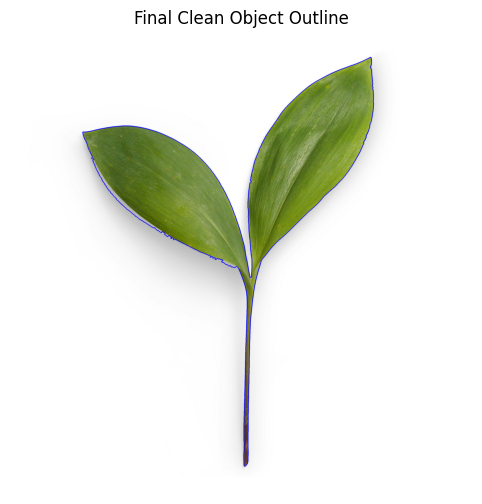

In [282]:
img5_gray = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(
    img5_gray, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
clean = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
clean = cv2.morphologyEx(clean, cv2.MORPH_CLOSE, kernel)
edges = cv2.Canny(clean, 50, 150)

contours, _ = cv2.findContours(
    clean,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

largest_contour = max(contours, key=cv2.contourArea)

final = img5.copy()
cv2.drawContours(
    final,
    [largest_contour],
    -1,
    (0, 0, 255),
    3
)

plt.figure(figsize=(6,6))
plt.title("Final Clean Object Outline")
plt.imshow(final)
plt.axis("off")
plt.show()


Morphological cleaning removes noise and stabilizes object regions, enabling edge detection and contour extraction to highlight only meaningful object boundaries.